### Importing all required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

### TASK 1 

In [2]:
#loading the dataset 'customers.csv' 
customers = pd.read_csv('customers.csv')

In [3]:
#display dataset
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking the data
print('Shape: ',customers.shape)
print('\n')
print('Data Types:\n',customers.dtypes)
print('\n')
print('Sum of missing values in each attribute:\n',customers.isnull().sum())

Shape:  (200, 5)


Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Sum of missing values in each attribute:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
#descriptive statistics
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#set the customer ID as the index of the dataframe
customers.set_index('CustomerID', inplace = True)

#sort the index in ascending order of IDs
customers = customers.sort_index()

customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
customers.groupby(['Gender']).count()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,112,112,112
Male,88,88,88


        Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                 
Female  112                 112                     112
Male     88                  88                      88


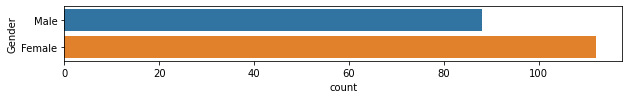

In [8]:
#plot to show difference in number of males and females
plt.figure(1 , figsize = (10 , 1))
print(customers.groupby(['Gender']).count())
sns.countplot(y = 'Gender', data = customers)
plt.show()

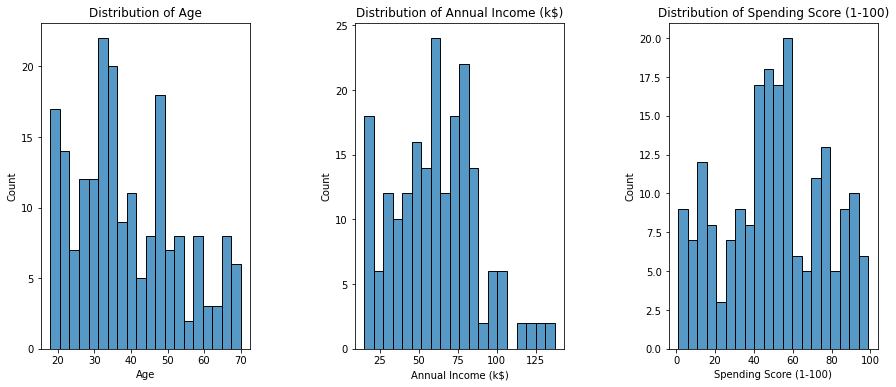

In [9]:
#plotting distribtuions of age, income and score
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(customers[x] , bins = 20)
    plt.title('Distribution of {}'.format(x))
plt.show()

In [10]:
#find skewness in each column
customers.skew(axis = 0, skipna = True)

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

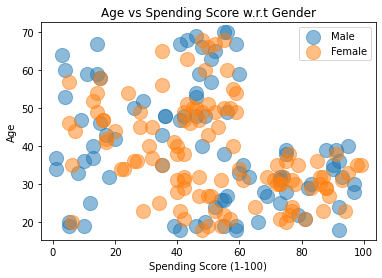

In [11]:
#exploring age vs spending score w.r.t. gender
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Spending Score (1-100)', y = 'Age', 
    data = customers[customers['Gender'] == gender] ,
    s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Spending Score (1-100)'), plt.ylabel('Age') 
plt.title('Age vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

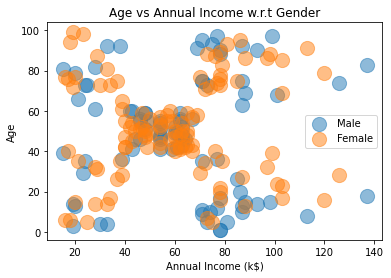

In [12]:
#exploring age vs income w.r.t. gender
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)', 
    data = customers[customers['Gender'] == gender] ,
    s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Age') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

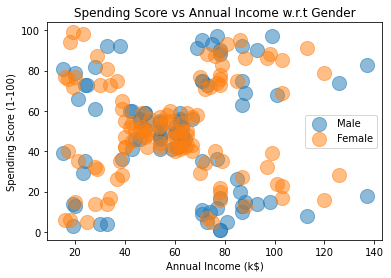

In [13]:
#exploring score vs income w.r.t gender
for gender in ['Male' , 'Female']:
        plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
        data = customers[customers['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

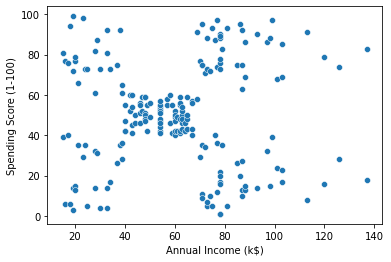

In [14]:
#exploring score vs income 
sns.scatterplot(data=customers, x="Annual Income (k$)", y="Spending Score (1-100)")

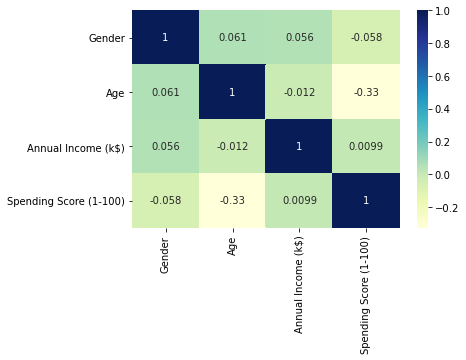

In [15]:
#label encoder to convert Gender to a numeric feature
le = preprocessing.LabelEncoder()
customers['Gender'] = le.fit_transform(customers.Gender)
#heatmap of correlations
corrmat = customers.corr()
ax = sns.heatmap(corrmat, annot=True, cmap="YlGnBu")

TASK 2 - CLUSTERING

### K-means

#### Developing customer segmentation using Spending Score and Annual Income

In [16]:
X = customers.iloc[:,2:].to_numpy()

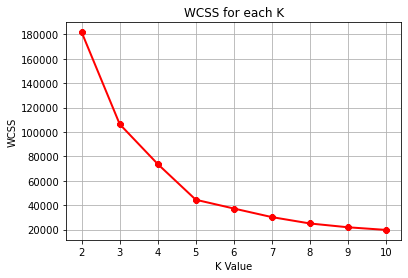

Knee:  5


In [17]:
#finding the appropriate number of clusters using KneeLocator
#creating an empty list to hold scores for each k
wcss = []
#setting the range of number of clusters from 2 to 11
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
#plotting results
plt.grid()
plt.plot(range(2,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(2,11,1))
plt.ylabel("WCSS")
plt.title("WCSS for each K")
plt.show()
#locating the knee with maximum curvature
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
print("Knee: ",kl.elbow)

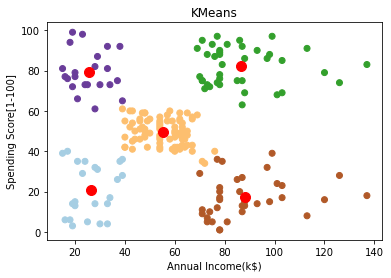

In [18]:
#Implementing KMeans model with the appropriate number of clusters
km = KMeans(n_clusters=5)
#predicting clusters
y_pred = km.fit_predict(X)
#visulization of clusters
plt.scatter(X[:,0], X[:,1],c=y_pred,cmap='Paired')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, color="red")
plt.title("KMeans")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score[1-100]")
plt.show()

In [19]:
#checking performance of model using Silhouette Coefficient
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Coefficient: ", score)

Silhouette Coefficient:  0.4477405371237999


### DBSCAN


#### Developing customer segmentation using Spending Score and Annual Income

In [20]:
X = customers.iloc[:,2:].to_numpy()

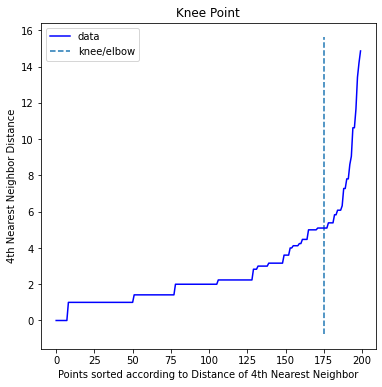

Knee:  5.0990195135927845


In [21]:
#finding the appropriate value for eps using Knee Locator

#using nearest neighbors model to find distances between points
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

#plotting knee plot
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve = 'convex', direction = 'increasing', interp_method = 'polynomial')
knee.plot_knee()
plt.xlabel("Points sorted according to Distance of 4th Nearest Neighbor")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()

#finding eps with best performance
print('Knee: ',distances[knee.knee])

Number of clusters:  7


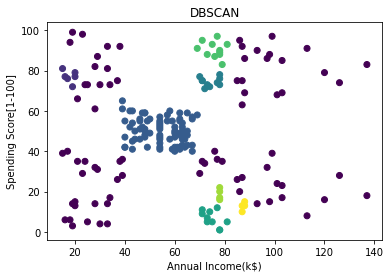

In [22]:
#implementing the dbscan model 
clustering = DBSCAN(eps=5.099, min_samples=4).fit(X)
#storing the labels formed by the DBSCAN
labels = clustering.labels_

#identifying which points make up our “core points”
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[clustering.core_sample_indices_] = True

#calculating "the number of clusters"
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters: ',n_clusters_)

#define and map colors
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)
plt.title("DBSCAN")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score[1-100]")
plt.show()

In [23]:
#checking performance of model using Silhouette Coefficient
score = silhouette_score(X, clustering.labels_)
print("Silhouette Coefficient: ", score)

Silhouette Coefficient:  0.13799244650401032


-end-